# Bernstein-Vazirani Algorithm - Generalized Version

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
secretnumber = '1010001'

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

circuit.h(range(len(secretnumber)))
circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

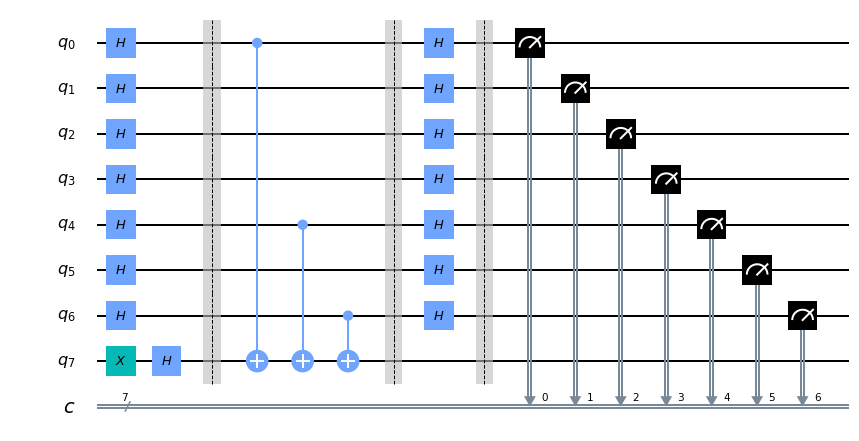

In [4]:
circuit.draw(output='mpl')

The Secret Number is {'1010001': 1}


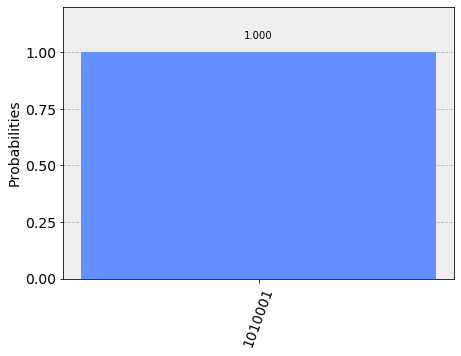

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots = 1).result()
counts = result.get_counts()
print(f'The Secret Number is {counts}')
plot_histogram(counts)